In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/google_stock/GOOGL.csv', index_col= 'Date', parse_dates=True)

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600


In [5]:
len(df)

4041

In [6]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4041 entries, 2004-08-19 to 2020-09-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4041 non-null   float64
 1   High       4041 non-null   float64
 2   Low        4041 non-null   float64
 3   Close      4041 non-null   float64
 4   Adj Close  4041 non-null   float64
 5   Volume     4041 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 221.0 KB


In [8]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-31,1643.569946,1644.500000,1625.329956,1629.530029,1629.530029,1321100
2020-09-01,1632.160034,1659.219971,1629.530029,1655.079956,1655.079956,1133800
2020-09-02,1668.010010,1726.099976,1660.189941,1717.390015,1717.390015,2476100
2020-09-03,1699.520020,1700.000000,1607.709961,1629.510010,1629.510010,3180200
2020-09-04,1609.000000,1634.989990,1537.970093,1581.209961,1581.209961,2792533


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4041.000000,4041.000000,4041.000000,4041.000000,4041.000000,4.041000e+03
mean,533.983149,538.995819,528.658860,533.999060,533.999060,6.909802e+06
std,383.007917,386.590237,379.488087,383.326004,383.326004,7.895987e+06
min,49.644646,50.920921,48.028027,50.055054,50.055054,5.206000e+05
25%,241.211212,243.688690,238.873871,241.036041,241.036041,1.844600e+06
50%,342.592590,345.795807,338.598602,342.177185,342.177185,4.191600e+06
75%,791.979980,798.000000,786.200012,790.460022,790.460022,8.702600e+06
max,1699.520020,1726.099976,1660.189941,1717.390015,1717.390015,8.215110e+07


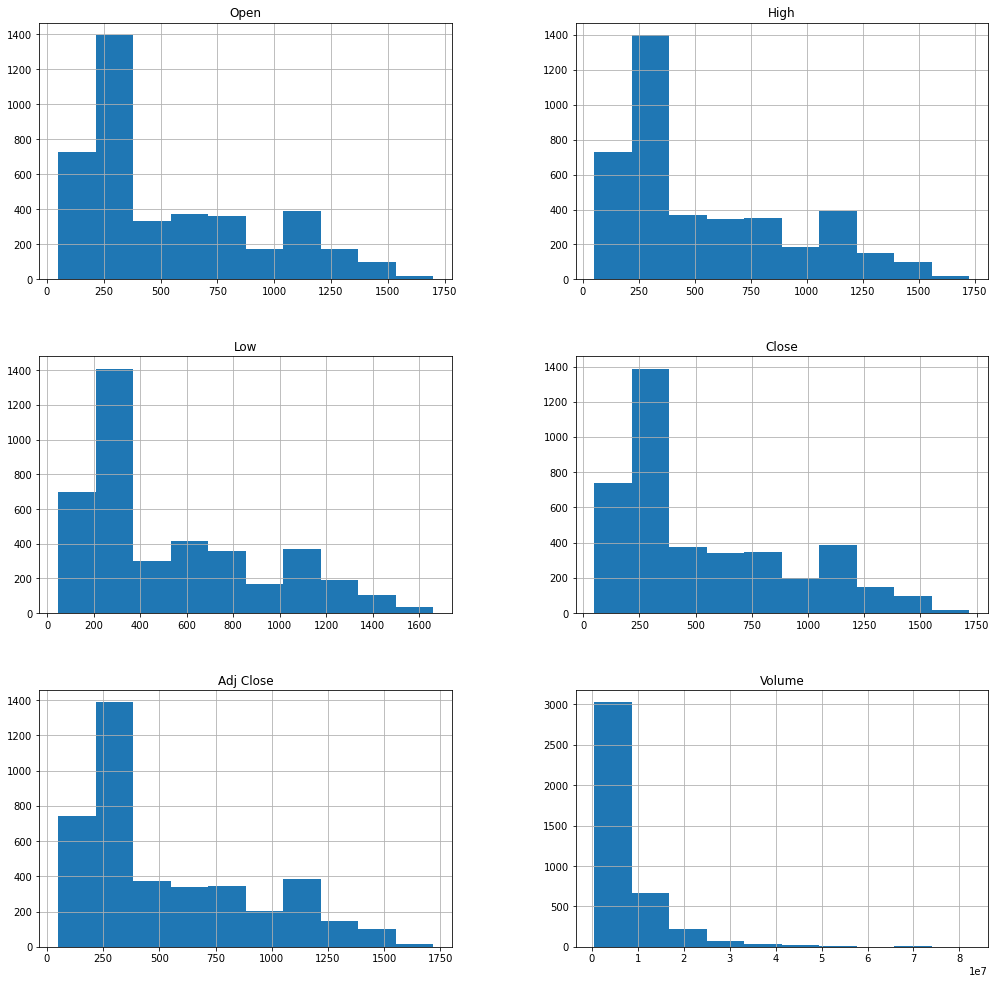

In [10]:
df.hist(figsize = (17,17))
plt.show()

In [11]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999891,0.999852,0.999747,0.999747,-0.537342
High,0.999891,1.000000,0.999809,0.999868,0.999868,-0.535615
Low,0.999852,0.999809,1.000000,0.999880,0.999880,-0.539565
Close,0.999747,0.999868,0.999880,1.000000,1.000000,-0.537584
Adj Close,0.999747,0.999868,0.999880,1.000000,1.000000,-0.537584
Volume,-0.537342,-0.535615,-0.539565,-0.537584,-0.537584,1.000000


In [12]:
import seaborn as sns

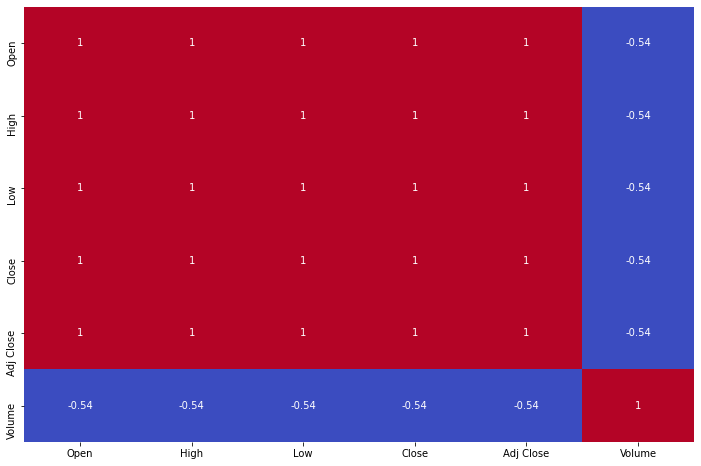

In [13]:
fig, ax = plt.subplots(figsize= (12,8))
ax = sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm',cbar = False)

In [14]:
df.drop([ 'High', 'Open', 'Low', 'Adj Close', 'Volume'], axis=1,inplace=True)

In [15]:
df

,Close
Date,
2004-08-19,50.220219
2004-08-20,54.209209
2004-08-23,54.754753
2004-08-24,52.487488
2004-08-25,53.053055
...,...
2020-08-31,1629.530029
2020-09-01,1655.079956
2020-09-02,1717.390015


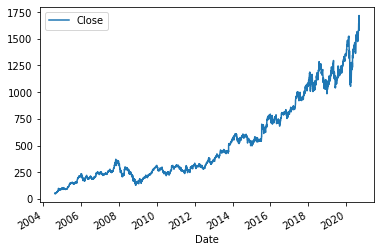

In [16]:
df.plot()

## **train test split**

In [17]:
test_size = 172

In [18]:
test_ind = len(df)- test_size

In [19]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [20]:
train.head()

,Close
Date,
2004-08-19,50.220219
2004-08-20,54.209209
2004-08-23,54.754753
2004-08-24,52.487488
2004-08-25,53.053055


In [21]:
test.head()

,Close
Date,
2020-01-02,1368.680054
2020-01-03,1361.520020
2020-01-06,1397.810059
2020-01-07,1395.109985
2020-01-08,1405.040039


In [22]:
len(train)

3869

In [23]:
len(test)

172

## **scaling data**

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:
scaled_train = scaler.fit_transform(train)


In [27]:
scaled_train

array([[1.25848158e-04],
       [3.16527567e-03],
       [3.58095518e-03],
       ...,
       [9.94033932e-01],
       [9.82657916e-01],
       [9.82414132e-01]])

In [28]:
scaled_train.shape


(3869, 1)

In [29]:
scaled_test = scaler.transform(test)

In [30]:
scaled_test.shape

(172, 1)

## **Time series Generator**

In [31]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [32]:
length = 10

In [33]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length = length, batch_size = 1)

In [34]:
len(generator)

3859

## **Model**

In [35]:
from tensorflow.keras.models import Sequential

In [36]:
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [37]:
n_features =1

In [38]:
model = Sequential()

model.add(LSTM(100, activation='relu', input_shape = (length, n_features)))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [40]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length = length, batch_size=1)

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
early_stop = EarlyStopping(monitor = "val_loss", patience= 1, mode = 'min')

In [43]:
model.fit_generator(generator, epochs = 30, validation_data=validation_generator,
                    callbacks = [early_stop])

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


3859/3859 [==============================] - 137s 35ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 2/30
3859/3859 [==============================] - 133s 34ms/step - loss: 2.6917e-04 - val_loss: 0.0010
Epoch 3/30
3859/3859 [==============================] - 133s 34ms/step - loss: 1.8806e-04 - val_loss: 7.3912e-04
Epoch 4/30
3859/3859 [==============================] - 135s 35ms/step - loss: 1.3630e-04 - val_loss: 8.0562e-04


In [44]:
losses = pd.DataFrame(model.history.history)

In [45]:
losses

,loss,val_loss
0,0.001510,0.001962
1,0.000269,0.001017
2,0.000188,0.000739
3,0.000136,0.000806


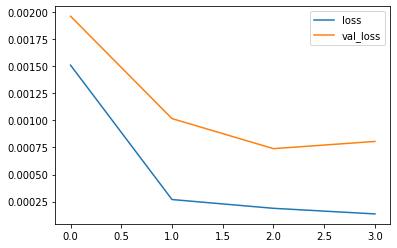

In [46]:
losses.plot()

## **Single-Step Prediction**

In [47]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[scaled_test[i]]], axis = 1)

In [48]:
test_predictions

[array([0.97446036], dtype=float32),
 array([0.9899213], dtype=float32),
 array([0.9904683], dtype=float32),
 array([1.0088452], dtype=float32),
 array([1.0114894], dtype=float32),
 array([1.0182908], dtype=float32),
 array([1.0279925], dtype=float32),
 array([1.0350995], dtype=float32),
 array([1.0431781], dtype=float32),
 array([1.0405146], dtype=float32),
 array([1.0457335], dtype=float32),
 array([1.0532167], dtype=float32),
 array([1.0704017], dtype=float32),
 array([1.0749776], dtype=float32),
 array([1.0782417], dtype=float32),
 array([1.0802399], dtype=float32),
 array([1.0710413], dtype=float32),
 array([1.0500491], dtype=float32),
 array([1.0544567], dtype=float32),
 array([1.0605533], dtype=float32),
 array([1.0606107], dtype=float32),
 array([1.0483903], dtype=float32),
 array([1.0714056], dtype=float32),
 array([1.0577306], dtype=float32),
 array([1.0537976], dtype=float32),
 array([1.070434], dtype=float32),
 array([1.075852], dtype=float32),
 array([1.0925077], dtype=flo

In [49]:
len(test_predictions)

172

In [50]:
predictions = scaler.inverse_transform(test_predictions)

In [51]:
predictions

array([[1328.95137094],
       [1349.24249777],
       [1349.96045622],
       [1374.07855665],
       [1377.54881956],
       [1386.47503482],
       [1399.20772844],
       [1408.53508675],
       [1419.13752926],
       [1415.64192111],
       [1422.4912354 ],
       [1432.31235638],
       [1454.86617098],
       [1460.87173937],
       [1465.15555295],
       [1467.77800221],
       [1455.70569268],
       [1428.15511251],
       [1433.9397706 ],
       [1441.94104134],
       [1442.01629477],
       [1425.97808224],
       [1456.18381015],
       [1438.23641325],
       [1433.07474722],
       [1454.90856949],
       [1462.01931516],
       [1483.87848266],
       [1488.62633301],
       [1497.45038508],
       [1496.07892641],
       [1501.21477785],
       [1503.08782179],
       [1507.90279008],
       [1503.56296667],
       [1478.26091536],
       [1424.67968668],
       [1385.78492483],
       [1379.39323278],
       [1325.17766927],
       [1325.0214519 ],
       [1361.120

In [52]:
test

,Close
Date,
2020-01-02,1368.680054
2020-01-03,1361.520020
2020-01-06,1397.810059
2020-01-07,1395.109985
2020-01-08,1405.040039
...,...
2020-08-31,1629.530029
2020-09-01,1655.079956
2020-09-02,1717.390015


In [53]:
true_predictions = pd.DataFrame(data=predictions, index= test.index,columns=['predictions'])

In [54]:
true_predictions

,predictions
Date,
2020-01-02,1328.951371
2020-01-03,1349.242498
2020-01-06,1349.960456
2020-01-07,1374.078557
2020-01-08,1377.548820
...,...
2020-08-31,1615.239848
2020-09-01,1610.703990
2020-09-02,1630.539920


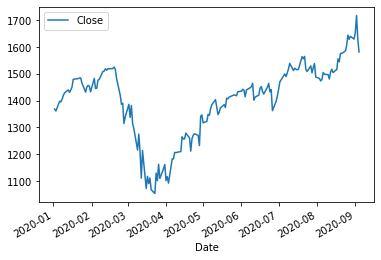

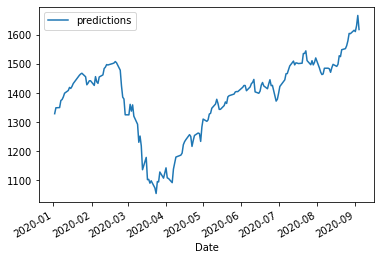

In [55]:
test.plot()
true_predictions.plot()

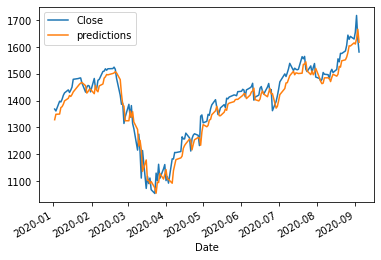

In [56]:
ax = test.plot()
true_predictions.plot(ax=ax)

## **Multi-Step Prediction**

In [57]:
test_predictions_2 = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]

  test_predictions_2.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis = 1)

In [58]:
test_predictions_2

[array([0.97446036], dtype=float32),
 array([0.9687832], dtype=float32),
 array([0.96283895], dtype=float32),
 array([0.9570291], dtype=float32),
 array([0.95128405], dtype=float32),
 array([0.9455823], dtype=float32),
 array([0.93994385], dtype=float32),
 array([0.9343762], dtype=float32),
 array([0.9288741], dtype=float32),
 array([0.9234353], dtype=float32),
 array([0.9180625], dtype=float32),
 array([0.9127528], dtype=float32),
 array([0.9075057], dtype=float32),
 array([0.90231997], dtype=float32),
 array([0.89719456], dtype=float32),
 array([0.89212865], dtype=float32),
 array([0.88712126], dtype=float32),
 array([0.88217163], dtype=float32),
 array([0.8772788], dtype=float32),
 array([0.8724419], dtype=float32),
 array([0.86766005], dtype=float32),
 array([0.86293256], dtype=float32),
 array([0.8582584], dtype=float32),
 array([0.8536371], dtype=float32),
 array([0.84906775], dtype=float32),
 array([0.84454966], dtype=float32),
 array([0.8400821], dtype=float32),
 array([0.83566

In [59]:
len(test_predictions_2)

172

In [60]:
predictions_2 = scaler.inverse_transform(test_predictions_2)

In [61]:
predictions_2

array([[1328.95137094],
       [1321.50057674],
       [1313.69925173],
       [1306.0743264 ],
       [1298.53443276],
       [1291.05133122],
       [1283.65138394],
       [1276.34429095],
       [1269.12324659],
       [1261.98527826],
       [1254.93398438],
       [1247.96545362],
       [1241.0790602 ],
       [1234.27323958],
       [1227.54658369],
       [1220.89799738],
       [1214.32622903],
       [1207.83026169],
       [1201.40884376],
       [1195.06080184],
       [1188.78504076],
       [1182.58062182],
       [1176.44621517],
       [1170.38111678],
       [1164.38423148],
       [1158.45462057],
       [1152.59134532],
       [1146.79362349],
       [1141.06004699],
       [1135.3899118 ],
       [1129.78212275],
       [1124.23589758],
       [1118.75021936],
       [1113.32422759],
       [1107.95714002],
       [1102.64801794],
       [1097.39592262],
       [1092.20015005],
       [1087.0597615 ],
       [1081.97389649],
       [1076.94185098],
       [1071.962

In [62]:
test

,Close
Date,
2020-01-02,1368.680054
2020-01-03,1361.520020
2020-01-06,1397.810059
2020-01-07,1395.109985
2020-01-08,1405.040039
...,...
2020-08-31,1629.530029
2020-09-01,1655.079956
2020-09-02,1717.390015


In [63]:
true_predictions_2 = pd.DataFrame(data=predictions_2, index= test.index,columns=['predictions_2'])

In [64]:
true_predictions_2

,predictions_2
Date,
2020-01-02,1328.951371
2020-01-03,1321.500577
2020-01-06,1313.699252
2020-01-07,1306.074326
2020-01-08,1298.534433
...,...
2020-08-31,711.748738
2020-09-01,710.132198
2020-09-02,708.526139


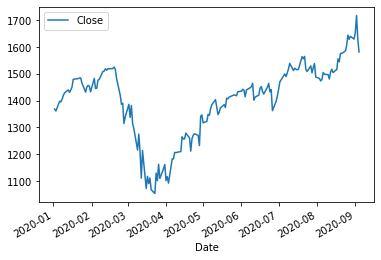

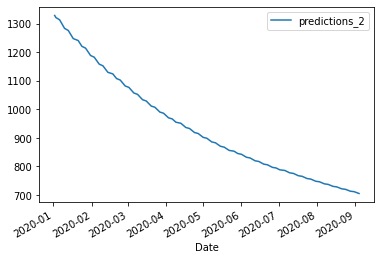

In [65]:
test.plot()
true_predictions_2.plot()

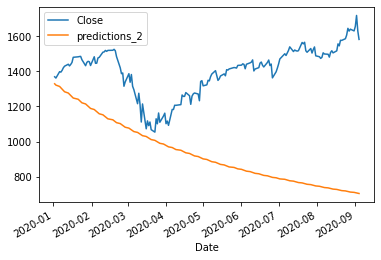

In [66]:
ax = test.plot()
true_predictions_2.plot(ax=ax)

## **Prediction Analysis**

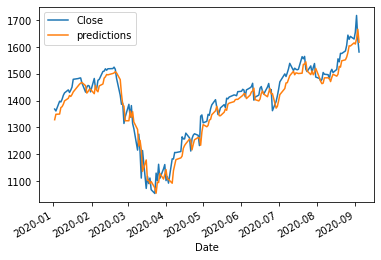

In [67]:
ax = test.plot()
true_predictions.plot(ax=ax)

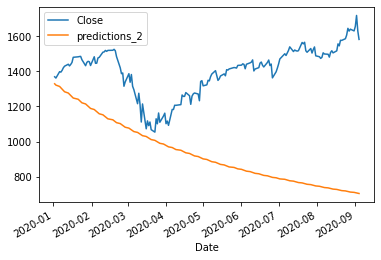

In [68]:
ax = test.plot()
true_predictions_2.plot(ax=ax)

**The two graphs generated in Single step prediction just differ by a time step, for multi-step prediction the the prediction goes to  down and after a while the prediction goes to almost  constant value and continue that way. For single step the prediction just approximates the last value for the original graph and gives that as prediction.** 